In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
import seaborn as sns
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf

In [25]:
df_w = pd.read_csv('AAPL.csv', index_col='Date',parse_dates = True)
df_w = df_w[df_w.index>'2017-01-01']
df_w.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,114.826157,115.351692,113.794891,116.150002,115.173210,28781900
2017-01-04,114.875732,115.530182,114.776566,116.019997,115.044304,21118100
2017-01-05,114.945137,115.877235,114.836060,116.610001,115.629341,22193600
2017-01-06,115.797913,117.166313,115.490517,117.910004,116.918411,31751900
2017-01-09,116.958061,118.425621,116.948158,118.989998,117.989319,33561900


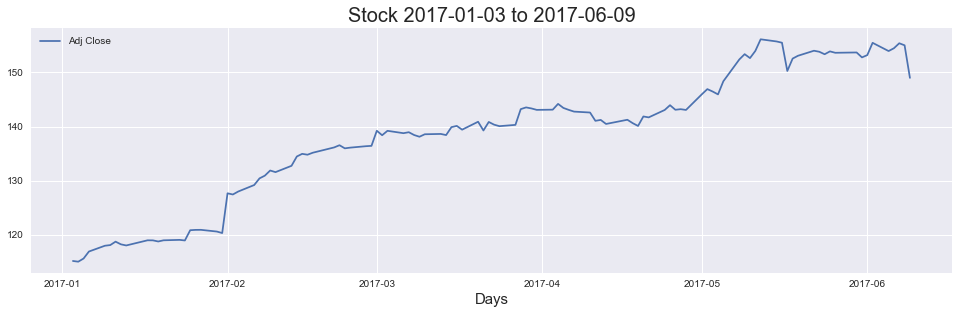

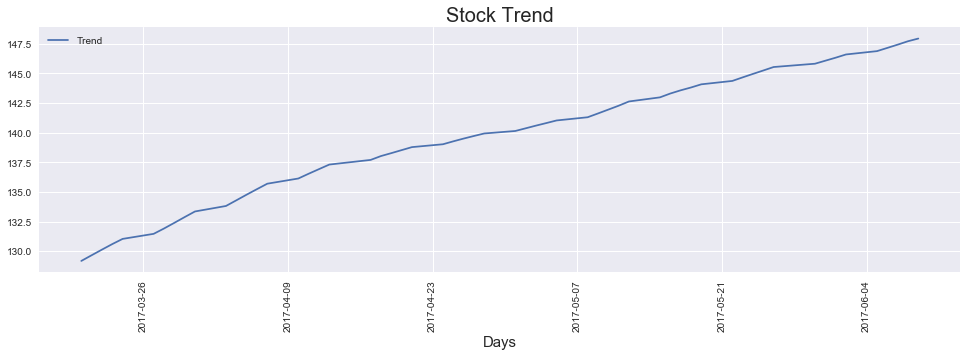

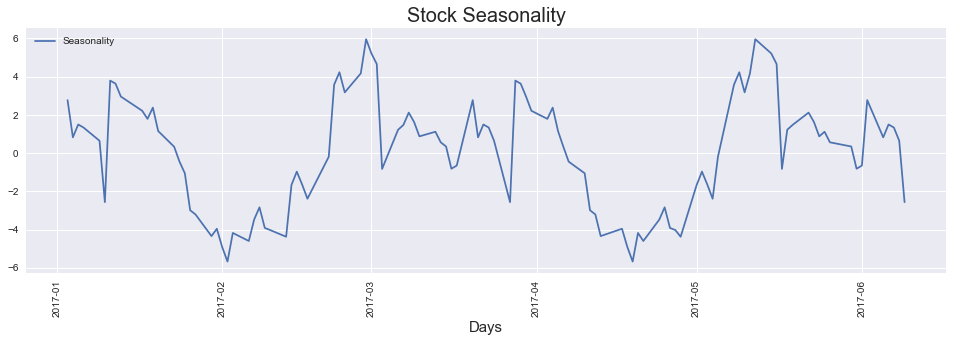

In [26]:
df_w  = df_w[['Adj Close']]
plt.plot(df_w['Adj Close'],label = 'Adj Close')
plt.title('Stock '+ str(df_w.index[0]).split(' ')[0] +' to '+ str(df_w.index[-1]).split(' ')[0],fontsize=20)
plt.xlabel('Days', fontsize=15)
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(16.5, 4.5)
plt.show()
decomposition = seasonal_decompose(df_w,model='additive',two_sided = False,freq =52 )
trend = decomposition.trend
seasonal = decomposition.seasonal
resid = decomposition.resid
plt.plot(trend,label='Trend')
plt.xlabel('Days', fontsize=15)
plt.title('Stock Trend',fontsize=20)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(16.5, 4.5)
plt.show()
plt.plot(seasonal,label='Seasonality')
plt.xlabel('Days', fontsize=15)
plt.title('Stock Seasonality',fontsize=20)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(16.5, 4.5)
plt.show()

In [27]:
###### Adjusting Outliers #######
wnd = 20

df_w['RollingStd'] = df_w['Adj Close'].rolling(window=wnd).std()
df_w['Rollingmean'] = df_w['Adj Close'].rolling(window=wnd).mean()

st= df_w['RollingStd'][wnd]
mn= df_w['Rollingmean'][wnd]


for i in range(wnd+1,len(df_w)):
    if df_w['RollingStd'][i]-st > st:
        df_w['RollingStd'][i] = st*1.96
        df_w['Adj Close'][i] = mn+st*1.96
        if mn > df_w['Rollingmean'][i]:
            df_w['Rollingmean'][i] = mn-st       
        else: 
            df_w['Rollingmean'][i] = mn+st
        st = df_w['RollingStd'][i]
        mn = df_w['Rollingmean'][i]
    else:
        st = df_w['RollingStd'][i]
        mn = df_w['Rollingmean'][i]

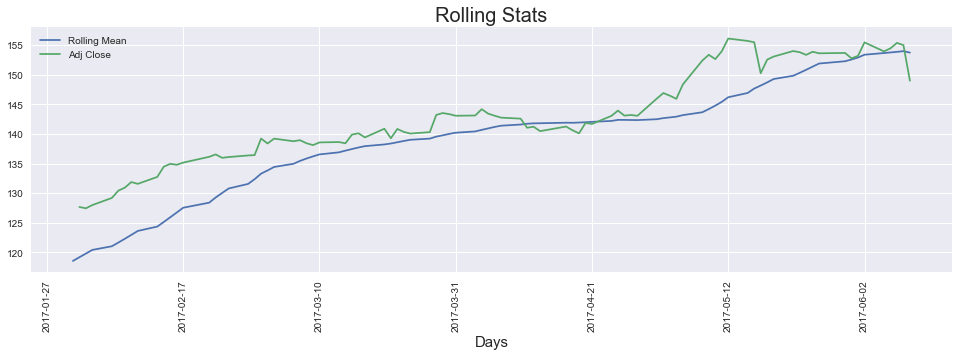

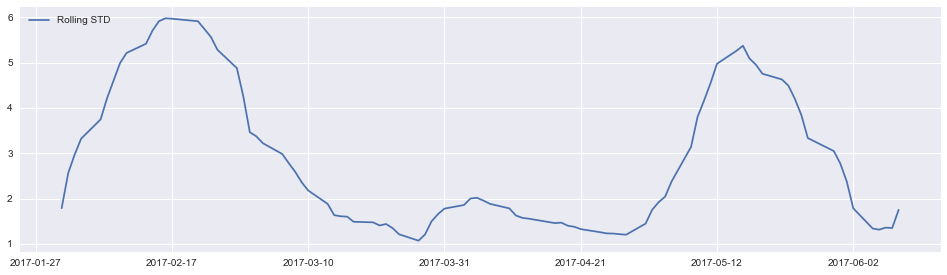

In [28]:
plt.plot(df_w['Rollingmean'],label='Rolling Mean')
plt.plot(df_w['Adj Close'][wnd:],label='Adj Close')
plt.xlabel('Days', fontsize=15)
plt.title('Rolling Stats',fontsize=20)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(16.5, 4.5)
plt.show()

plt.plot(df_w['RollingStd'],label='Rolling STD')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(16.5, 4.5)
plt.show()


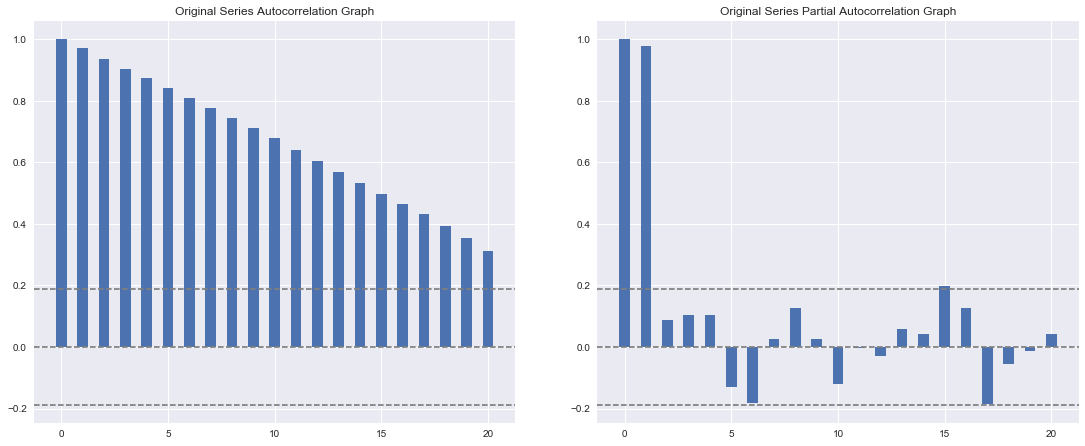

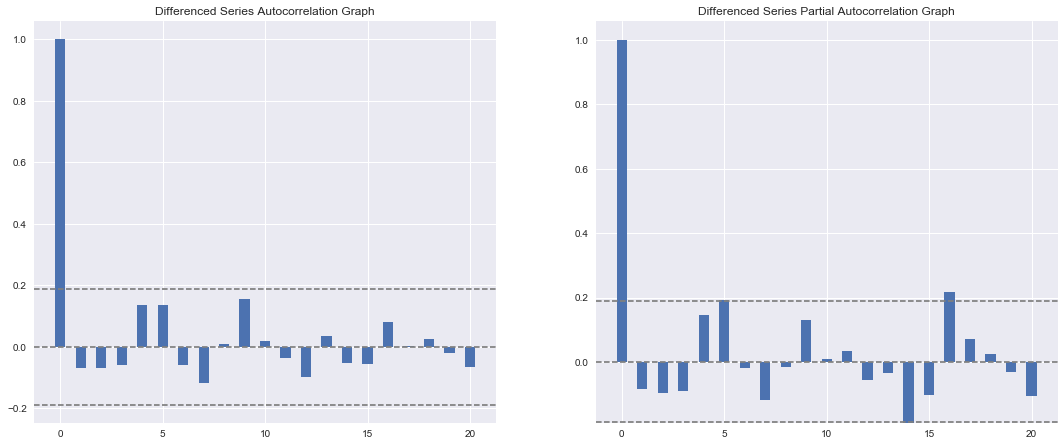

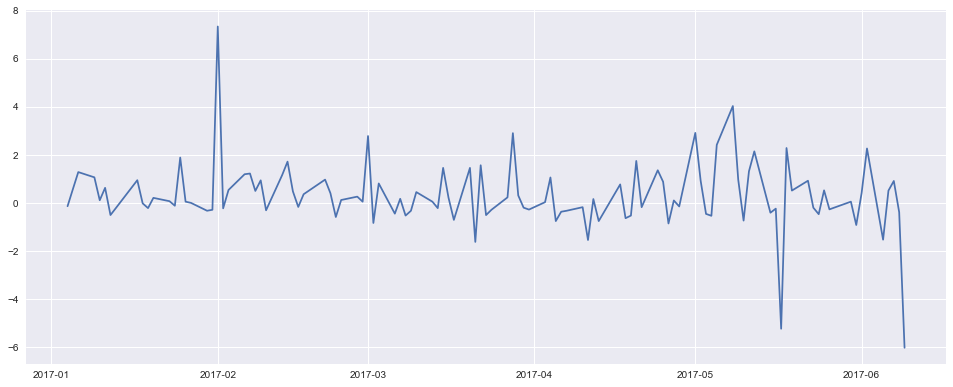

In [29]:
                        ############## Revenue Time series ACF and PACF Charts ####################

df_w = df_w[['Adj Close']]
lag_acf = acf(df_w, nlags=20)
lag_pacf = pacf(df_w, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.bar(range(len(lag_acf)), lag_acf, width=1/2)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_w)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_w)),linestyle='--',color='gray')
plt.title('Original Series Autocorrelation Graph')
#Plot PACF:
plt.subplot(122)
plt.bar(range(len(lag_pacf)), lag_pacf, width=1/2)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_w)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_w)),linestyle='--',color='gray')
plt.title('Original Series Partial Autocorrelation Graph')
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(16.5, 6.5)
plt.show()

df_w_diff = df_w.diff(periods=1,axis=0) #pd.rolling_mean(df_w,1)
df_w_diff  = df_w_diff[1:]
lag_acf = acf(df_w_diff, nlags=20)
lag_pacf = pacf(df_w_diff, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.bar(range(len(lag_acf)), lag_acf, width=1/2)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_w_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_w_diff)),linestyle='--',color='gray')
plt.title('Differenced Series Autocorrelation Graph')
#Plot PACF:
plt.subplot(122)
plt.bar(range(len(lag_pacf)), lag_pacf, width=1/2)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_w_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_w_diff)),linestyle='--',color='gray')
plt.title('Differenced Series Partial Autocorrelation Graph')
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(16.5, 6.5)
plt.show()

plt.plot(df_w_diff,label='De-Trend')
fig = plt.gcf()
fig.set_size_inches(16.5, 6.5)
plt.show()


In [33]:
       #################### Looking at charts above we can create a differenced AR model of order 1  ###################

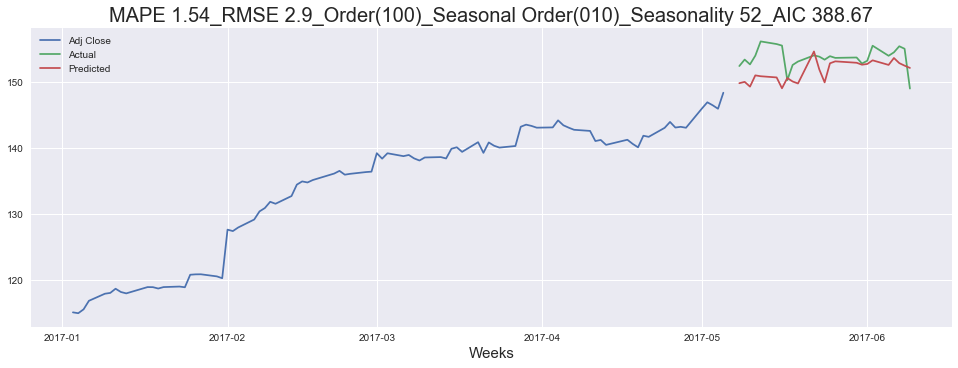

In [30]:
                                     ############### Run SARIMA Model ###################
train = df_w['Adj Close'][0:-24]
test = df_w['Adj Close'][len(train):]

p =1
d= 0
q = 0
pp = 0
dd = 1
qq = 0
z = 52
aic = 'null'

amape = 99
af = []

try:
    model = smt.SARIMAX(train.asfreq(freq='1d'), exog=None, order=(p, d, q), seasonal_order=(pp,dd,qq,z),trend = 'n').fit()
    aic = model.aic
    aic = round(aic,2)
    pred = model.get_forecast(len(test))
    fcst = pred.predicted_mean
    fcst.index = test.index
    mapelist = []
    for i in range(len(fcst)):
                    mapelist.insert(i, (np.absolute(test[i] - fcst[i])) / test[i])
    mape = np.mean(mapelist) * 100
    mape = round(mape,2)
except:
    mape = 9999
    pass

amape = mape
sap  = p
sad = d
saq = q
app = pp
add = dd
aqq = qq
az = z
af= fcst
mse = mean_squared_error(test, af)
rmse = np.sqrt(mse)
rmse = round(rmse,1)

plt.plot(train)
plt.plot(test,label='Actual')
plt.plot(af,label='Predicted')
fig = plt.gcf()
fig.set_size_inches(16.5, 5.5)
plt.title("MAPE "+str(amape)+"_"+"RMSE "+str(rmse)+"_"+"Order"+"("+str(sap)+str(sad)+str(saq)+")"+"_"+"Seasonal Order"
          +"("+str(app)+str(add)+str(aqq)+")"+"_"+"Seasonality "+str(az)+"_"+"AIC "+str(aic) ,fontsize=20)
plt.legend(loc='upper left')
plt.xlabel('Weeks', fontsize=15)
plt.show()

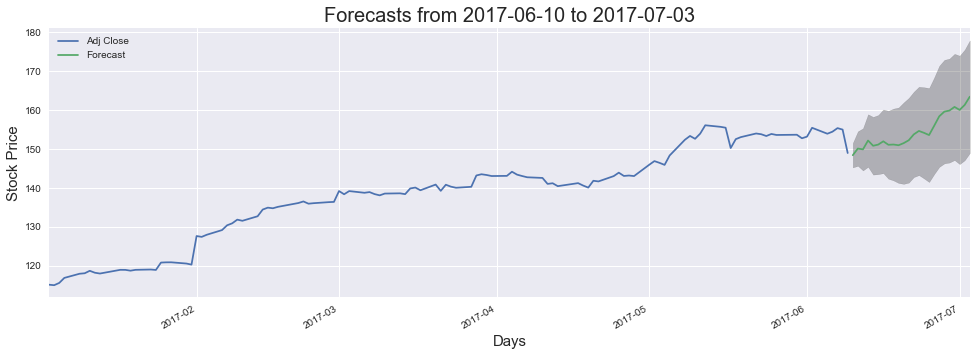

In [33]:
model = smt.SARIMAX(df_w.asfreq(freq='1d'), exog=None, order=(sap, sad, saq), seasonal_order=(app,add,aqq,az)).fit()
pred = model.get_forecast(24)
cf = pred.conf_int(alpha=0.05)
ax = df_w.plot(label='observed', figsize=(16.5, 5.5))
pred.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(cf.index, cf.iloc[:, 0],cf.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Days',fontsize = 15)
ax.set_ylabel('Stock Price',fontsize = 15)
plt.legend(loc='upper left')
plt.title("Forecasts from "+str(cf.index[0]).split(' ')[0]+" to "+str(cf.index[-1]).split(' ')[0],fontsize = 20)
plt.show()

In [36]:
fcst = pred.conf_int(alpha=0.05)
fcst['Forecast'] = pred.predicted_mean
fcst = fcst.round(1)
forecast = pd.DataFrame()
forecast['Lower Price'] = fcst.apply(lambda x: "{:,}".format(x['lower Adj Close']), axis=1)
forecast['Upper Price'] = fcst.apply(lambda x: "{:,}".format(x['upper Adj Close']), axis=1)
forecast['Forecast'] = fcst.apply(lambda x: "{:,}".format(x['Forecast']), axis=1)
forecast

,Lower Price,Upper Price,Forecast
2017-06-10,145.3,151.6,148.4
2017-06-11,145.7,154.5,150.1
2017-06-12,144.5,155.3,149.9
2017-06-13,145.4,158.9,152.2
2017-06-14,143.4,158.2,150.8
2017-06-15,143.6,158.7,151.1
2017-06-16,143.8,160.1,152.0
2017-06-17,142.4,159.8,151.1
2017-06-18,141.9,160.4,151.2
2017-06-19,141.3,160.7,151.0
